<a href="https://colab.research.google.com/github/anikch/Object-identification-using-Facebook-Detectron/blob/main/Object_identification_using_Facebook_Detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron Mask R-CNN


In [ ]:
import os
from os.path import exists
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Cloning detectron git repo and installing
project_name= 'Detectron'
! git clone -q https://github.com/facebookresearch/Detectron.git
!cd $project_name && pip install -q -r requirements.txt
!cd $project_name && make
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py

     |████████████████████████████████| 375 kB 7.4 MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writ

# Loading pre-trained weights

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/root/.wget-hsts'. HSTS will be disabled.
--2021-11-23 15:19:59--  https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 (160K) [image/jpeg]
Saving to: ‘/content/Detectron/output/dog.jpg’

/content/Detectron/ 100%[===================>] 159.92K  --.-KB/s    in 0.02s   

2021-11-23 15:19:59 (9.01 MB/s) - ‘/content/Detectron/output/dog.jpg’ saved [163759/163759]



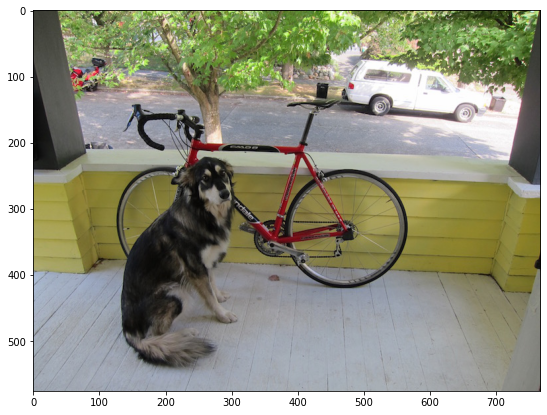

In [ ]:
# Getting image
img_url= 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
img_name= img_url.split('/')[-1].split('.')[0]
img_ext= img_url.split('/')[-1].split('.')[1]
save_img= r'/content/Detectron/output/'+img_name+'.'+img_ext
!wget -O $save_img $img_url
plt.figure(figsize=(12, 7))
plt.imshow(mpimg.imread(save_img))

In [ ]:
MODEL_CFG= 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL= 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'
op_format= 'png'
!cd Detectron && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG  --output-dir output --image-ext $img_ext --output-ext $op_format --thresh 0.8  \
    --wts $PRETRAINED_MODEL_URL \
    output

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  60: Loading weights from: /tmp/detectron-download-cache/3649

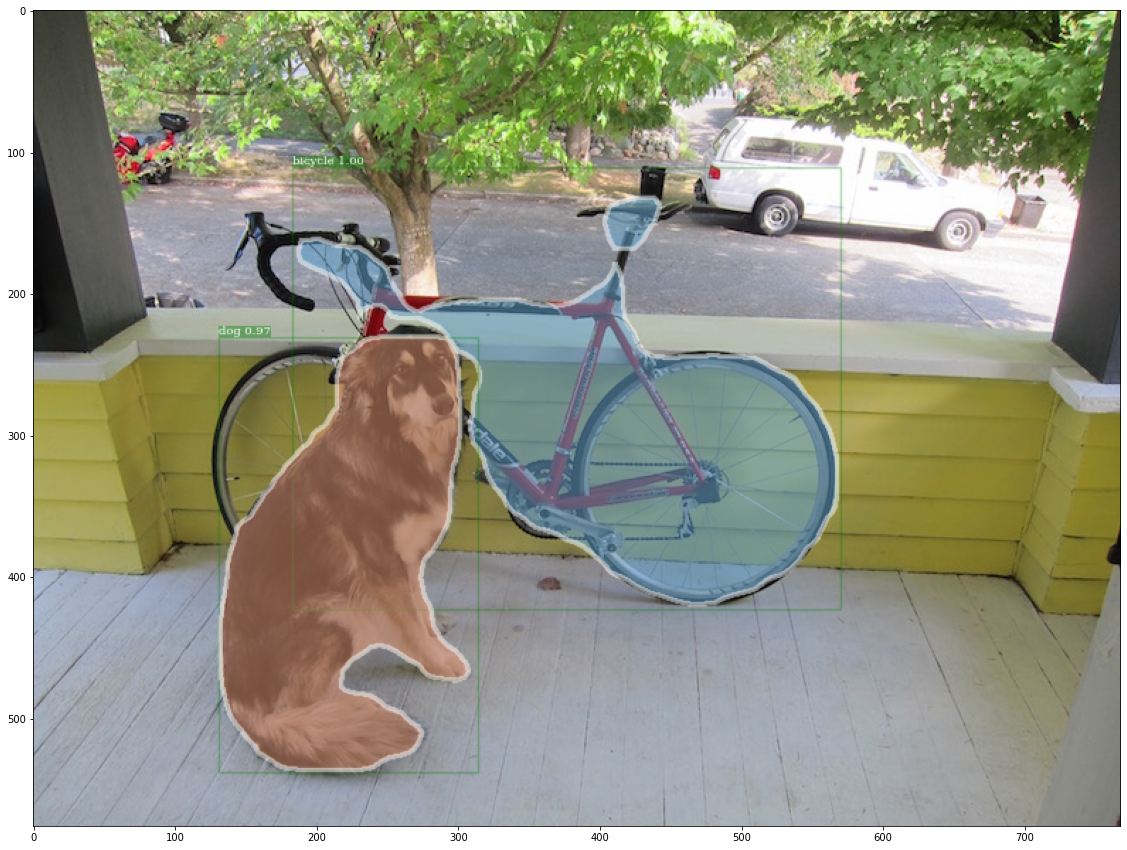

In [ ]:
# Identifying objects
plt.figure(figsize=(25, 15))
plt.imshow(mpimg.imread(save_img+'.'+op_format))
plt.show()